In [31]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

In [32]:
dataset = load_boston() #加载数据集
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

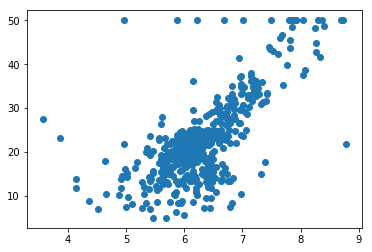

In [33]:
plt.scatter(X_rm,y)

### Gradient descent

### Assume that the target funciton is a linear function
$$ y = k*rm + b$$

In [34]:
#define target function
def price(rm, k, b):
    return k * rm + b

### Define mean square loss

$$ loss = \frac{1}{n} \sum{\mid y_i - \hat{y_i}\mid}$$

$$ loss = \frac{1}{n} \sum{\mid y_i - (kx_i + b_i) \mid}$$

In [35]:
# define loss function 
def loss(y,y_hat):
    s=0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i > y_hat_i:
            s += (y_i - y_hat_i)
        if y_i < y_hat_i:
            s += (y_hat_i - y_i)
    return s/len(list(y))

### Define partial derivatives

$$ y > \hat y $$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -1$$

$$ y < \hat y $$
$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = 1 $$

In [36]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i>y_hat_i:
            gradient += x_i
        else:
            gradient += x_i*(-1)
    return -1/n * gradient

    
def partial_derivative_b(y, y_hat):
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i>y_hat_i:
            return -1
        else:
            return 1

In [37]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 235.39371319185034, parameters k is -30.224530024910564 and b is -22.910786131640506
Iteration 1, the loss is 235.35321656246768, parameters k is -30.21824539052321 and b is -22.909786131640505
Iteration 2, the loss is 235.31271993308485, parameters k is -30.21196075613586 and b is -22.908786131640504
Iteration 3, the loss is 235.2722233037024, parameters k is -30.205676121748507 and b is -22.907786131640503
Iteration 4, the loss is 235.23172667431967, parameters k is -30.199391487361154 and b is -22.9067861316405
Iteration 5, the loss is 235.1912300449371, parameters k is -30.193106852973802 and b is -22.9057861316405
Iteration 6, the loss is 235.15073341555424, parameters k is -30.18682221858645 and b is -22.9047861316405
Iteration 7, the loss is 235.11023678617164, parameters k is -30.180537584199097 and b is -22.903786131640498
Iteration 8, the loss is 235.06974015678875, parameters k is -30.174252949811745 and b is -22.902786131640497
Iteration 9, the loss

Iteration 186, the loss is 227.86134012666997, parameters k is -29.05558802886302 and b is -22.72478613164028
Iteration 187, the loss is 227.82084349728746, parameters k is -29.04930339447567 and b is -22.723786131640278
Iteration 188, the loss is 227.78034686790477, parameters k is -29.043018760088316 and b is -22.722786131640277
Iteration 189, the loss is 227.73985023852202, parameters k is -29.036734125700963 and b is -22.721786131640275
Iteration 190, the loss is 227.69935360913937, parameters k is -29.03044949131361 and b is -22.720786131640274
Iteration 191, the loss is 227.65885697975668, parameters k is -29.02416485692626 and b is -22.719786131640273
Iteration 192, the loss is 227.61836035037393, parameters k is -29.017880222538906 and b is -22.71878613164027
Iteration 193, the loss is 227.57786372099133, parameters k is -29.011595588151554 and b is -22.71778613164027
Iteration 194, the loss is 227.5373670916086, parameters k is -29.0053109537642 and b is -22.71678613164027
Ite

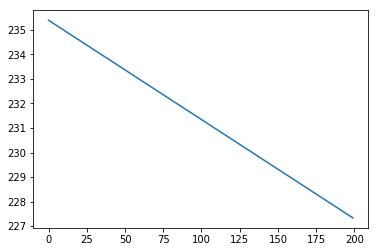

In [38]:
plt.plot(list(range(iteration_num)),losses)

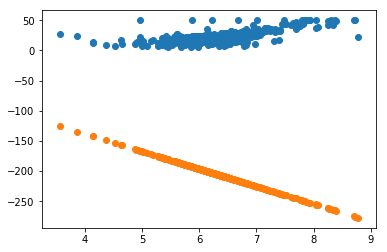

In [40]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)